In [1]:
import pandas as pd
import numpy as np


# --------------Leitura dos Datasets-------------------------------------------------------------------------------------------------------------
df_customers = pd.read_csv("data/olist_customers_dataset.csv")
df_orders = pd.read_csv("data/olist_orders_dataset.csv")
df_items = pd.read_csv("data/olist_order_items_dataset.csv")
df_products = pd.read_csv("data/olist_products_dataset.csv")
df_reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
df_payments = pd.read_csv("data/olist_order_payments_dataset.csv")
df_sellers = pd.read_csv("data/olist_sellers_dataset.csv")
df_geolocations = pd.read_csv("data/olist_geolocation_dataset.csv")

# Descrição dos datasets
- **df_customers**: dataset contendo informações sobre os consumidores e sua localização. Colunas:
    - **customer_id** (*UUID*): identifica cada pedido de um consumidor com um id unico.
    - **customer_unique_id** (*UUID*): identifica cada consumidor com um id único.
    - **customer_zip_code_prefix** (*int*): primeiros 5 dígitos CEP da localização de entrega do consumidor.
    - **customer_city** (*str*): cidade do consumidor.
    - **customer_state** (*str*): estado do consumidor.

- **df_orders**: dataset contendo as informações sobre o pedido. Colunas:
    - **order_id** (*UUID*): identifica cada pedido com um código único.
    - **customer_id** (*UUID*): chave que conecta ao dataset **df_costumers** com um id único por pedido.
    - **order_status** (*string*): status do pedido.
    - **order_purchase_timestamp** (*datetime*): data e hora da compra.
    - **order_approved_at** (*datetime*): data e hora de aprovação do pagamento.
    - **order_delivered_carrier_date** (*datetime*): data e hora de postagem da ordem.
    - **order_delivered_customer_date** (*datetime*): data e hora real da entrega ao cliente.
    - **order_estimated_delivery_date** (*datetime*): data e hora estimada de entrega.

- **df_items**: dataset contendo informações sobre os items de cada pedido. Colunas:
    - **order_id** (*UUID*): chave que conecta ao **df_orders** através de um id único por ordem.
    - **order_item_id** (*int*): identifica unicamente cada item dentro de uma ordem.
    - **product_id** (*UUID*): identifica cada produto por meio de um id único.
    - **seller_id** (*UUID*): id único de vendedor.
    - **shipping_limit_date** (*datetime*): data limite para enviar o pedido.
    - **price** (*float*): preço do item.
    - **freight** (*float*): valor do frete do item.

- **df_products**: dataset que contém informações sobre cada produto vendido por Olist. Colunas:
    - **product_id** (*UUID*): id único do produto.
    - **product_category_name** (*string*): nome da categoria a qual o produto pertence.
    - **product_name_length** (*int*): número de caracteres extraídos do nome do produto.
    - **product_description_length** (*int*): número de caracteres extraídos da descrição do produto.
    - **product_photos_qty** (*int*): número de fotos publicadas do produto.
    - **product_weight_g** (*float*): peso do produto medido em gramas.
    - **product_length_cm** (*float*): comprimento do produto medido em centímetros.
    - **product_height_cm** (*float*): altura do produto medida em centímetros.
    - **product_width_cm** (*float*): largura do produto medida em centímetros.

- **df_reviews**: dataset contendo informações sobre os reviews feitas pelos clientes. Colunas:
    - **review_id** (*UUID*): identificador único de cada review.
    - **order_id** (*UUID*): identificador único de cada ordem, conectando ao dataset **df_orders**.
    - **review_score** (*int*): nota variando de 1 a 5 dada pelo cliente em uma pesquisa de satisfação.
    - **review_comment_title** (*string*): título do comentário deixado pelo cliente na review.
    - **review_comment_message** (*string*): mensagem do comentário deixado pelo cliente na review.
    - **review_creation_date** (*datetime*): data em que a pesquisa de satisfação foi enviada ao cliente.
    - **review_answer_timestamp** (*datetime*): data e hora em que foi respondida a pesquisa de satisfação pelo usuário.

- **df_payments**: dataset que contém informações das opções de pagamento dos pedidos. Colunas:
    - **order_id** (*UUID*): identificador único da ordem.
    - **payment_sequential** (*int*): número sequencial que identifica cada método de pagamento utilizado
    por um cliente quando separa o valor em mais de um método de pagamento.
    - **payment_type** (*string*): forma de pagamento utilizada.
    - **payment_installments** (*int*): número de parcelas escolhido pelo cliente.
    - **payment_value** (*float*): valor da transação.

- **df_sellers**: dataset que contém informações sobre vendedores de produtos da Olist. Colunas:
    - **seller_id** (*UUID*): identificador único do vendedor.
    - **seller_zip_code_prefix** (*int*): primeiros 5 dígitos do CEP do vendedor.
    - **seller_city** (*string*): cidade do vendedor.
    - **seller_state** (*string*): estado do vendedor.

- **df_geolocations**: dataset contendo informações de localização sobre CEPs brasileiros. Colunas:
    - **geolocation_zip_code_prefix** (*int*): primeiros 5 dígitos do CEP.
    - **geolocation_lat** (*float*): latitude em que o CEP se encontra.
    - **geolocation_lng** (*float*): longitude em que o CEP se encontra.
    - **geolocation_city** (*string*): nome da cidade a qual o CEP pertence.
    - **geolocation_state** (*string*): sigla do estado que o CEP pertence.

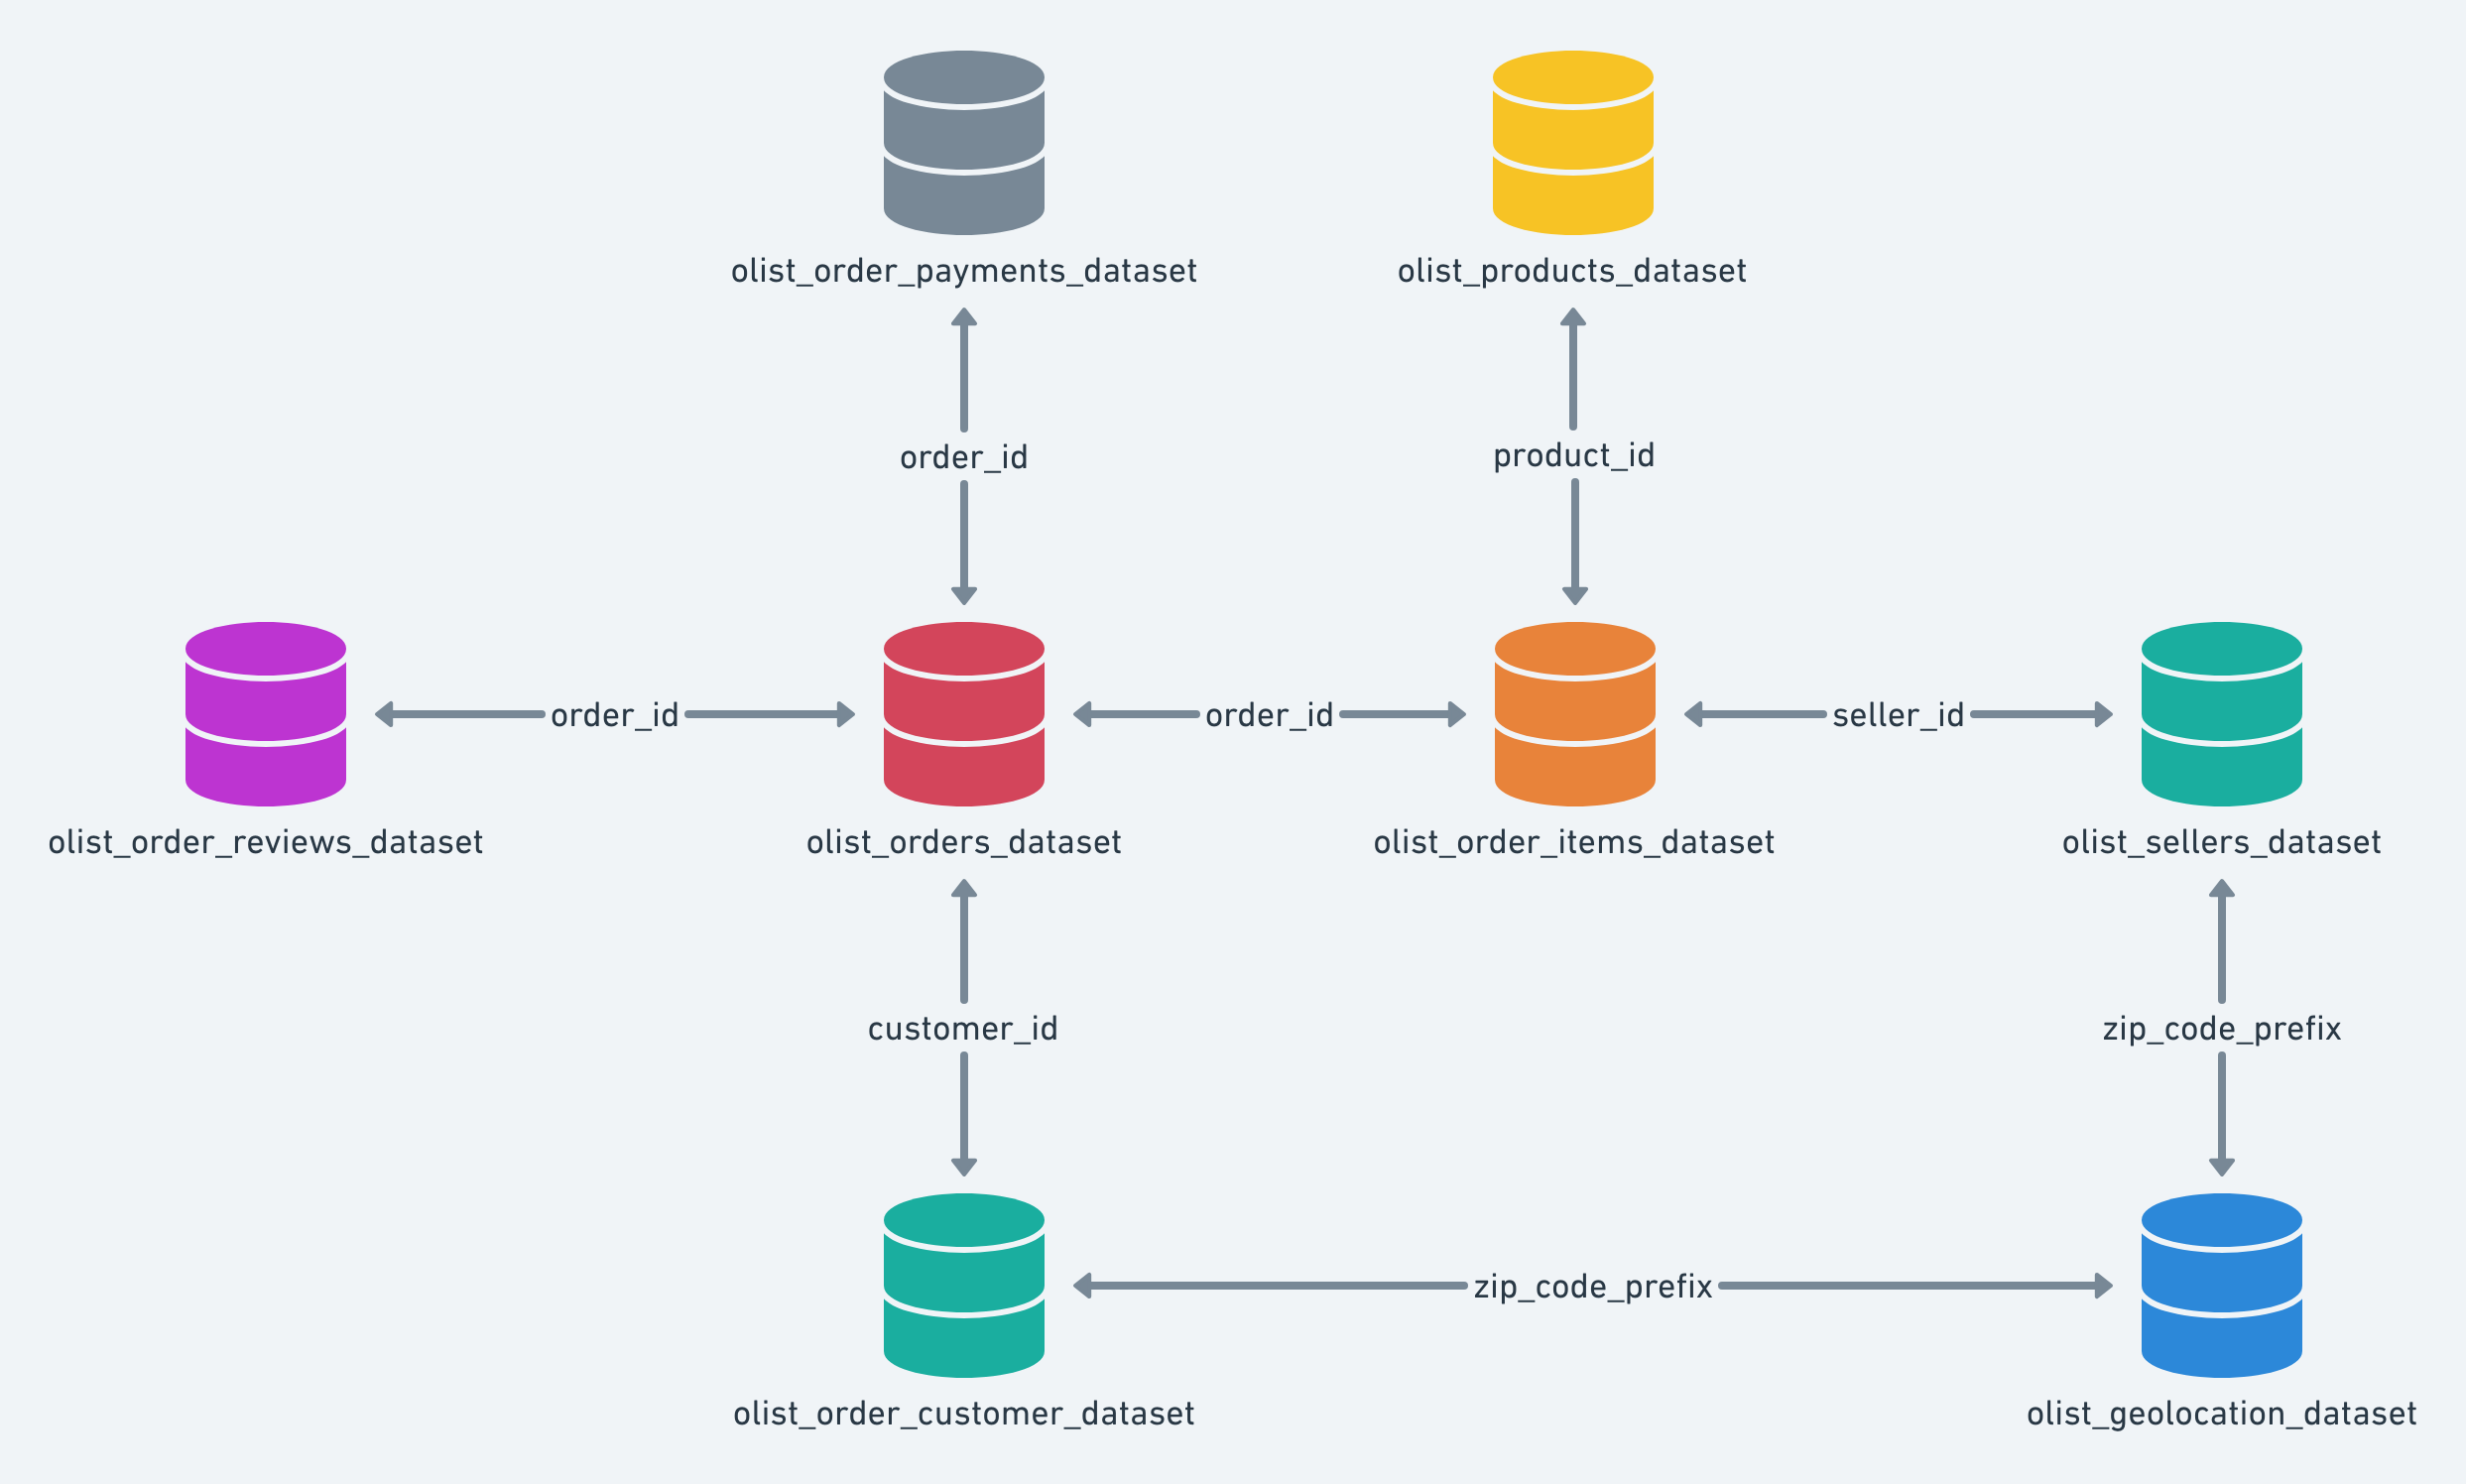

In [2]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [9]:
df_geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:

df_geolocations_customers = df_geolocations.rename(columns={
    "geolocation_zip_code_prefix": "customer_zip_code_prefix"
})

df_geolocations_sellers = df_geolocations.rename(columns={
    "geolocation_zip_code_prefix": "seller_zip_code_prefix"
})

geo_agg_customers = (df_geolocations_customers
           .groupby("customer_zip_code_prefix", as_index=False)
           .agg(lat=("geolocation_lat", "mean"),
                lng=("geolocation_lng", "mean")))
geo_agg_sellers = (df_geolocations_sellers
           .groupby("seller_zip_code_prefix", as_index=False)
           .agg(lat=("geolocation_lat", "mean"),
                lng=("geolocation_lng", "mean")))

In [11]:
geo_agg_sellers.head()

,seller_zip_code_prefix,lat,lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [12]:
geo_agg_customers.head()

,customer_zip_code_prefix,lat,lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [13]:
df = (df_orders
           .merge(df_items, on="order_id", how="left")
           .merge(df_customers, on="customer_id", how="left")
           .merge(df_products, on="product_id", how="left")
           .merge(df_reviews, on="order_id", how="left")
           .merge(df_payments, on="order_id", how="left")
           .merge(df_sellers, on="seller_id", how="left")
           .merge(geo_agg_customers, on="customer_zip_code_prefix", how="left")
           .merge(geo_agg_sellers, on="seller_zip_code_prefix", how="left")
        )

In [14]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,lat_x,lng_x,lat_y,lng_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,credit_card,1.0,18.12,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,voucher,1.0,2.00,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,voucher,1.0,18.59,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,boleto,1.0,141.46,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,credit_card,3.0,179.12,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601


In [15]:

df[['customer_unique_id', 'customer_state']].head()

,customer_unique_id,customer_state
0,7c396fd4830fd04220f754e42b4e5bff,SP
1,7c396fd4830fd04220f754e42b4e5bff,SP
2,7c396fd4830fd04220f754e42b4e5bff,SP
3,af07308b275d755c9edb36a90c618231,BA
4,3a653a41f6f9fc3d2a113cf8398680e8,GO


In [16]:
df['region'] = df['customer_state'].map({
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'RS': 'Sul',
    'PR': 'Sul',
    'SC': 'Sul',
    'BA': 'Nordeste',
    'PE': 'Nordeste',
    'CE': 'Nordeste',
    'MA': 'Nordeste',
    'AL': 'Nordeste',
    'PB': 'Nordeste',
    'SE': 'Nordeste',
    'PI': 'Nordeste',
    'RN': 'Nordeste',
    'GO': 'Centro-oeste',
    'MT': 'Centro-oeste',
    'DF': 'Centro-oeste',
    'MS': 'Centro-oeste',
    'PA': 'Norte',
    'RO': 'Norte',
    'TO': 'Norte',
    'AC': 'Norte',
    'AM': 'Norte',
    'AP': 'Norte',
    'RR': 'Norte'
})

df['region'].head()

0         Sudeste
1         Sudeste
2         Sudeste
3        Nordeste
4    Centro-oeste
Name: region, dtype: object

In [31]:
#---------------------------------------Perfil dos clientes-------------------------------------------------------------------------------------------------------------
# Número de clientes por estado
df_not_cancelled_orders = df[df.order_status != 'canceled']
df_state_count = df_not_cancelled_orders[['customer_unique_id', 'customer_state']].groupby('customer_state').count().sort_values(by='customer_unique_id', ascending=False)
df_state_count.head(10)

,customer_unique_id
customer_state,
SP,49863
RJ,15422
MG,13744
RS,6540
PR,6014
SC,4324
BA,4074
DF,2505
GO,2451


In [18]:
df_not_cancelled_orders['region'].unique()

array(['Sudeste', 'Nordeste', 'Centro-oeste', 'Sul', 'Norte'],
      dtype=object)

In [33]:
# Ticket médio por região
df_region_ticket = df_not_cancelled_orders[['region', 'payment_value']].groupby('region').mean().sort_values(by='payment_value', ascending=False)
df_region_ticket

,payment_value
region,
Norte,230.215371
Nordeste,214.131286
Centro-oeste,196.368038
Sul,177.423492
Sudeste,161.889161


In [46]:
#-----------------------------------------------------Produtos e Categorias-------------------------------------------------------------------------------------------------------------------------------------
df_category_count = df_not_cancelled_orders[['product_category_name', 'order_id']].groupby('product_category_name').count().sort_values(by='order_id', ascending=False)
df_category_count.head(10)

,order_id
product_category_name,
cama_mesa_banho,11970
beleza_saude,9992
esporte_lazer,8952
moveis_decoracao,8794
informatica_acessorios,8104
utilidades_domesticas,7321
relogios_presentes,6192
telefonia,4707
ferramentas_jardim,4570


In [52]:
df_category_ticket = df_not_cancelled_orders[['product_category_name', 'payment_value']].groupby('product_category_name').mean().sort_values(by='payment_value', ascending=False)
df_category_ticket.head(10)

,payment_value
product_category_name,
pcs,1268.734318
telefonia_fixa,765.911530
portateis_casa_forno_e_cafe,656.786154
agro_industria_e_comercio,471.153214
eletrodomesticos_2,456.942022
moveis_escritorio,364.609328
sinalizacao_e_seguranca,340.736567
instrumentos_musicais,323.028658
eletroportateis,320.967590


In [22]:
#----------------------------------------------------------------------Comportamento de compra--------------------------------------------------------------------------------------------------------------------------
mean = df_not_cancelled_orders[['customer_unique_id', 'order_id']].groupby('customer_unique_id').count().mean()['order_id']
print(f'Número de compras médio por cliente: {mean:.2f}')

Número de compras médio por cliente: 1.24


In [23]:
# Tempo médio entre pedidos
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df_purchase = df[['order_id', 'order_purchase_timestamp']].groupby('order_id').mean().sort_values(by='order_purchase_timestamp')
df_purchase

,order_purchase_timestamp
order_id,
2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19
e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34
809a282bbd5dbcabb6f2f724fca862ec,2016-09-13 15:24:19
bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38
71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52
...,...
392ed9afd714e3c74767d0c4d3e3f477,2018-09-29 09:13:03
616fa7d4871b87832197b2a137a115d2,2018-10-01 15:30:09
a2ac6dad85cf8af5b0afb510a240fe8c,2018-10-03 18:55:29


In [ ]:
df_purchase['next_order_purchase_timestamp'] = df_purchase['order_purchase_timestamp'].shift(-1)
df_purchase.head()

,order_purchase_timestamp,next_order_purchase_timestamp
order_id,,
2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19,2016-09-05 00:15:34
e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34,2016-09-13 15:24:19
809a282bbd5dbcabb6f2f724fca862ec,2016-09-13 15:24:19,2016-09-15 12:16:38
bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,2016-10-02 22:07:52
71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52,2016-10-03 09:44:50


In [28]:
df_purchase['diff_timestamp'] = df_purchase['next_order_purchase_timestamp'] - df_purchase['order_purchase_timestamp']
df_purchase['diff_timestamp'].fillna(df_purchase['diff_timestamp'].mean())
df_purchase.head()

,order_purchase_timestamp,next_order_purchase_timestamp,diff_timestamp
order_id,,,
2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19,2016-09-05 00:15:34,0 days 03:00:15
e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34,2016-09-13 15:24:19,8 days 15:08:45
809a282bbd5dbcabb6f2f724fca862ec,2016-09-13 15:24:19,2016-09-15 12:16:38,1 days 20:52:19
bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,2016-10-02 22:07:52,17 days 09:51:14
71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52,2016-10-03 09:44:50,0 days 11:36:58


In [ ]:
print(f"Tempo médio entre os pedidos: {df_purchase['diff_timestamp'].mean()}")

Tempo médio entre os pedidos: 0 days 00:11:11.497375301


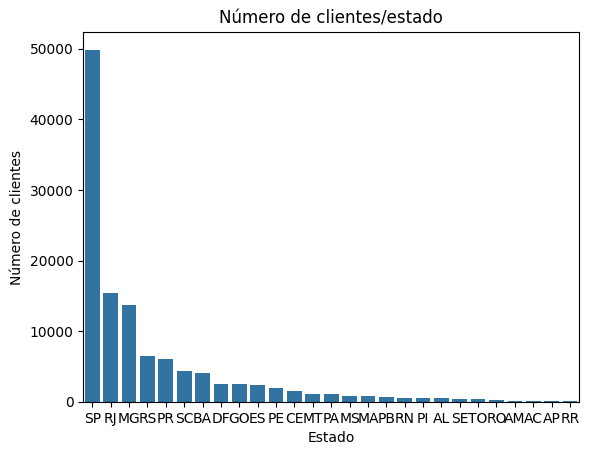

In [ ]:
#-----------------------------------------------------------------------Gráficos--------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(df_state_count, x='customer_state', y='customer_unique_id')
plt.title('Número de clientes/estado')
plt.xlabel('Estado')
plt.ylabel('Número de clientes')
plt.show()

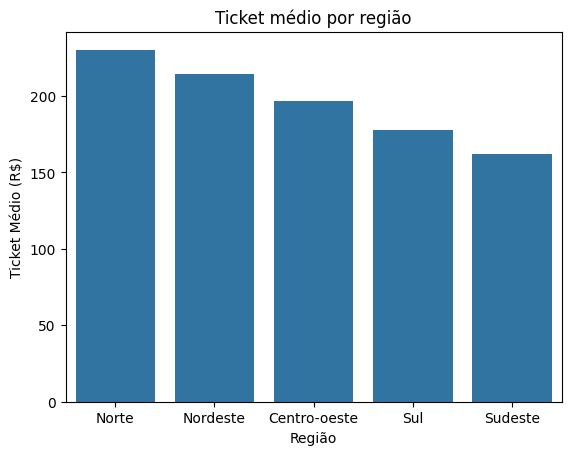

In [34]:
sns.barplot(df_region_ticket, x='region', y='payment_value')
plt.title('Ticket médio por região')
plt.xlabel('Região')
plt.ylabel('Ticket Médio (R$)')
plt.show()

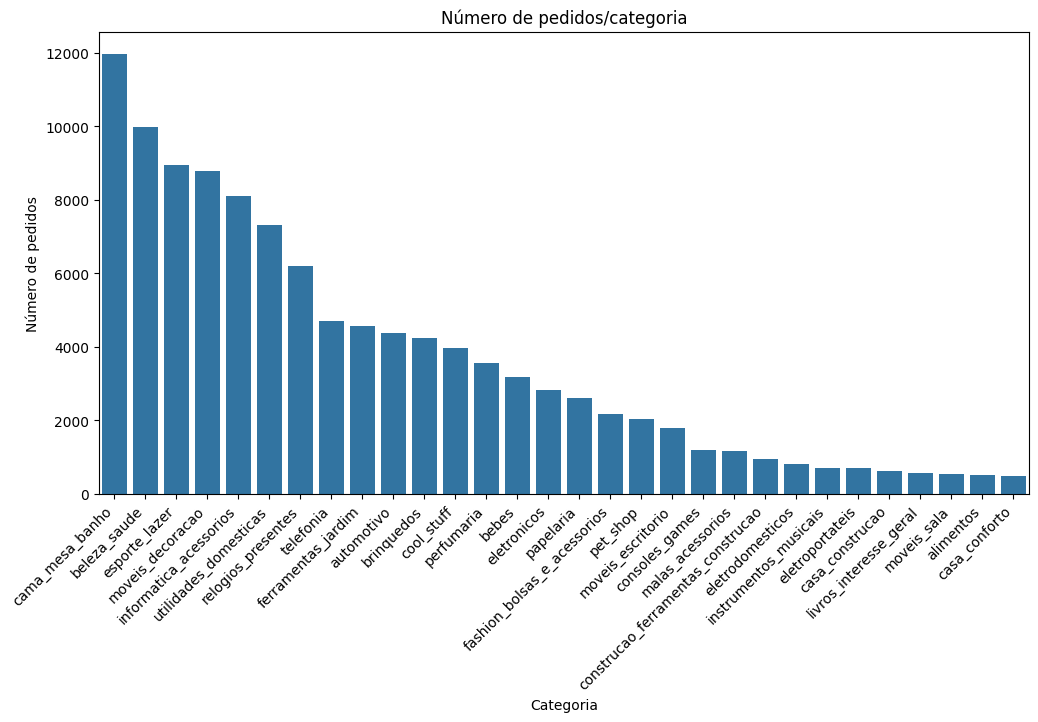

In [48]:
plt.figure(figsize=(12,6))
sns.barplot(df_category_count.head(30), x='product_category_name', y='order_id')
plt.xticks(rotation=45, ha='right')
plt.title('Número de pedidos/categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de pedidos')
plt.show()

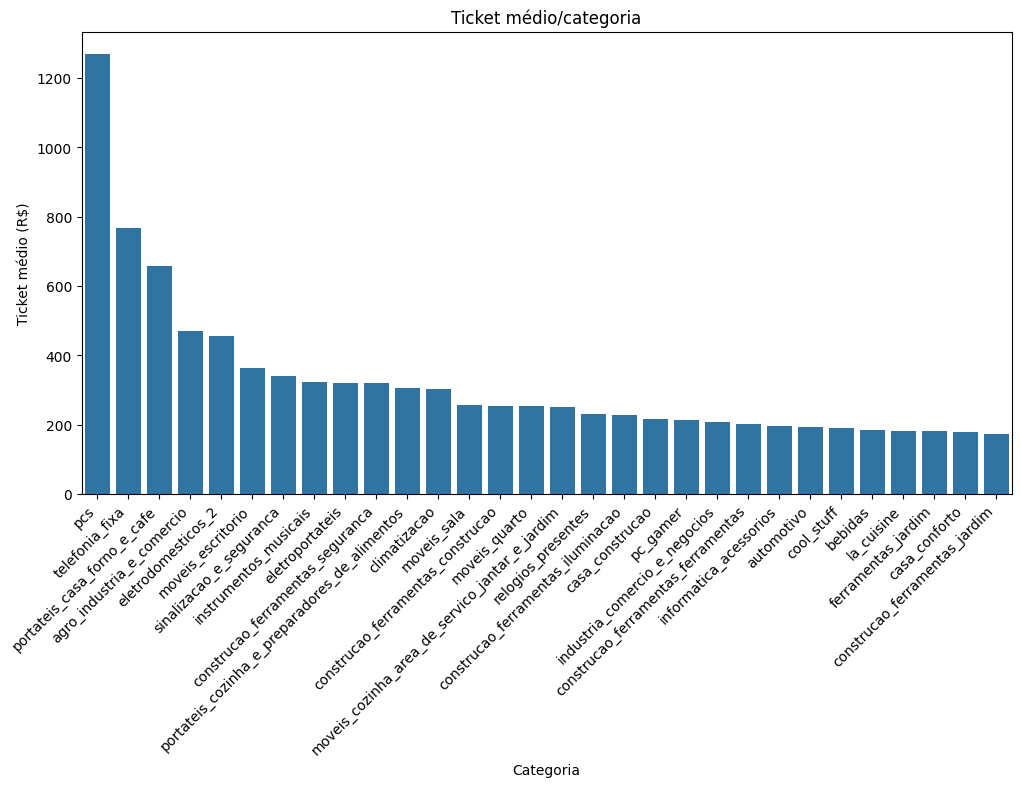

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(df_category_ticket.head(30), x='product_category_name', y='payment_value')
plt.xticks(rotation=45, ha='right')
plt.title('Ticket médio/categoria')
plt.xlabel('Categoria')
plt.ylabel('Ticket médio (R$)')
plt.show()

In [54]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'lat_x', 'lng_x', 'lat_y', 'lng_y',
       'region'],
      dtype='object')

In [55]:
cols = ['order_id', 'order_purchase_timestamp']

df[cols[1]] = pd.to_datetime(df['order_purchase_timestamp'])

df_orders_timestamp = df[cols]
df_orders_timestamp.head()

,order_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
1,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
2,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33
3,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37
4,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49


In [ ]:
df_orders_timestamp['order_purchase_date'] = df_orders_timestamp[cols[1]].apply(lambda x: x.to)